##Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

##Loading Data

In [3]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [61]:
#Loading Data
data  = pd.read_csv('/content/gdrive/MyDrive/DataScience_Pj/Personality classification Data16 Personalities/16P.csv',encoding='cp1252')
data.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


##Data Understanding

In [5]:
data.shape

(59999, 62)

In [6]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
#data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  False
How many missing values?  0
Number of participants after eliminating missing values:  59999


In [7]:
data.describe()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.
count,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000
mean,29999.000000,-0.000867,-0.000467,0.000267,-0.232887,-0.175653,0.005317,-0.476558,-0.000550,0.126819,...,0.001233,0.000133,0.115869,-0.002167,0.240687,-0.000533,0.000667,0.125152,0.001983,0.118202
std,17320.363738,0.365701,0.364652,1.527343,1.502173,1.502999,1.521413,1.445931,0.367361,1.537329,...,0.365517,0.367611,1.526440,0.366515,1.498320,0.364606,0.368426,1.515761,1.524584,1.542457
min,0.000000,-2.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,...,-1.000000,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-2.000000,-3.000000,-3.000000,-3.000000
25%,14999.500000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
50%,29999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44998.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,59998.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000


In [8]:
data.columns

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

In [9]:
data.shape

(59999, 62)

In [62]:
# count the number of NaN values in the entire DataFrame
num_nan = data.isna().sum().sum()
print("Number of NaN values in the entire DataFrame: ", num_nan)

data.shape
print(data.isna().any())

Number of NaN values in the entire DataFrame:  0
Response Id                                                                                   False
You regularly make new friends.                                                               False
You spend a lot of your free time exploring various random topics that pique your interest    False
Seeing other people cry can easily make you feel like you want to cry too                     False
You often make a backup plan for a backup plan.                                               False
                                                                                              ...  
You are very intrigued by things labeled as controversial.                                    False
You would pass along a good opportunity if you thought someone else needed it more.           False
You struggle with deadlines.                                                                  False
You feel confident that things will work out for yo

In [10]:
# group by 'Personality' column and count the types
counts = data.groupby('Personality').size()
print(counts)

Personality
ENFJ    3743
ENFP    3760
ENTJ    3737
ENTP    3760
ESFJ    3746
ESFP    3769
ESTJ    3759
ESTP    3749
INFJ    3761
INFP    3734
INTJ    3743
INTP    3742
ISFJ    3739
ISFP    3746
ISTJ    3756
ISTP    3755
dtype: int64


In [11]:
df = data.drop(['Response Id'], axis=1)
df.shape

(59999, 61)

In [12]:
print(df.columns)

Index(['You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more inclined to fo

In [13]:
cols = df.columns.tolist()

In [14]:
# Rename all columns except for the 'Personality' column
new_cols = []
for i, col in enumerate(cols):
    if col != 'Personality':
        new_cols.append('Q.' + str(i))
    else:
        new_cols.append(col)

# Set the new column names
df.columns = new_cols

# Print the updated dataframe
df.head()

,Q.0,Q.1,Q.2,Q.3,Q.4,Q.5,Q.6,Q.7,Q.8,Q.9,...,Q.51,Q.52,Q.53,Q.54,Q.55,Q.56,Q.57,Q.58,Q.59,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [63]:
# count the number of NaN values in the entire DataFrame
num_nan = df.isna().sum().sum()
print("Number of NaN values in the entire DataFrame: ", num_nan)

df.shape
print(df.isna().any())

Number of NaN values in the entire DataFrame:  0
Q.0            False
Q.1            False
Q.2            False
Q.3            False
Q.4            False
               ...  
Q.56           False
Q.57           False
Q.58           False
Q.59           False
Personality    False
Length: 61, dtype: bool


##Data Preprocessing

In [15]:
# Select the rows corresponding to the INFJ personality type
infj_df = df[df["Personality"] == "INFJ"]

# Compute the correlation matrix for the INFJ personality type
corr = infj_df.corr()

# Identify the most strongly correlated features
corr_matrix = corr.abs()
corr_threshold = 0.5
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
strong_pairs = corr_pairs[corr_pairs >= corr_threshold]
strong_pairs = strong_pairs[strong_pairs < 1.0]

# Print the most strongly correlated features
print(strong_pairs)

Q.32  Q.40    0.530064
Q.59  Q.34    0.515582
Q.48  Q.44    0.514985
Q.52  Q.13    0.509876
Q.32  Q.35    0.501586
Q.52  Q.34    0.500327
dtype: float64


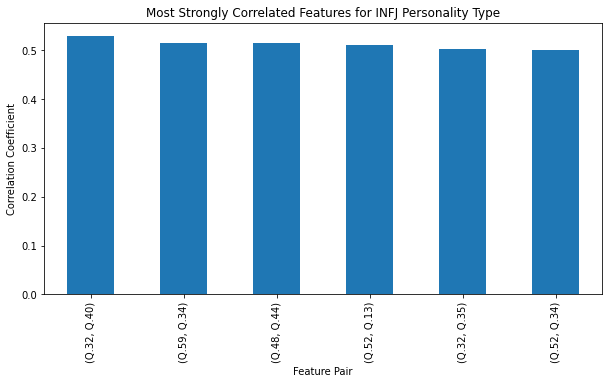

In [16]:
# Select the rows corresponding to the INFJ personality type
infj_df = df[df["Personality"] == "INFJ"]

# Compute the correlation matrix for the INFJ personality type
corr = infj_df.corr()

# Identify the most strongly correlated features
corr_matrix = corr.abs()
corr_threshold = 0.5
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
strong_pairs = corr_pairs[corr_pairs >= corr_threshold]
strong_pairs = strong_pairs[strong_pairs < 1.0]

# Create a bar chart of the most strongly correlated features
fig, ax = plt.subplots(figsize=(10, 5))
strong_pairs.plot(kind="bar", ax=ax)
plt.title("Most Strongly Correlated Features for INFJ Personality Type")
plt.xlabel("Feature Pair")
plt.ylabel("Correlation Coefficient")
plt.show()

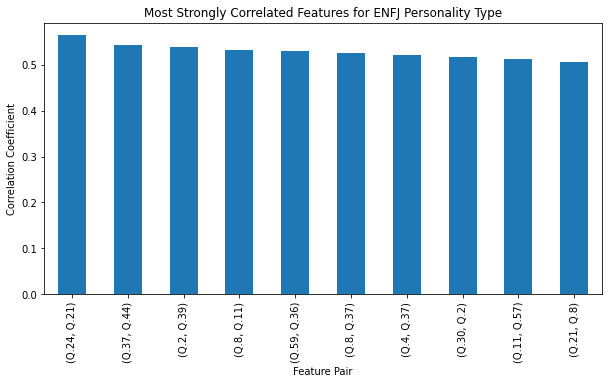

Next...ENFJ


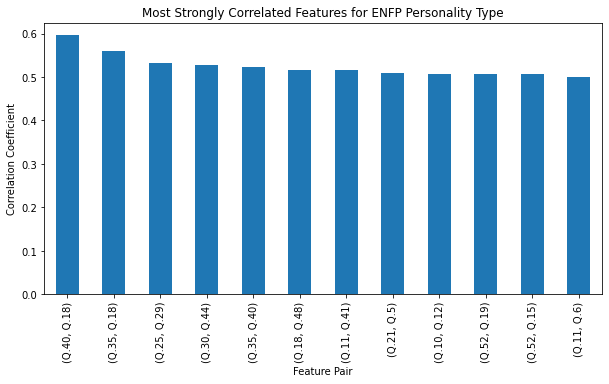

Next...ENFP


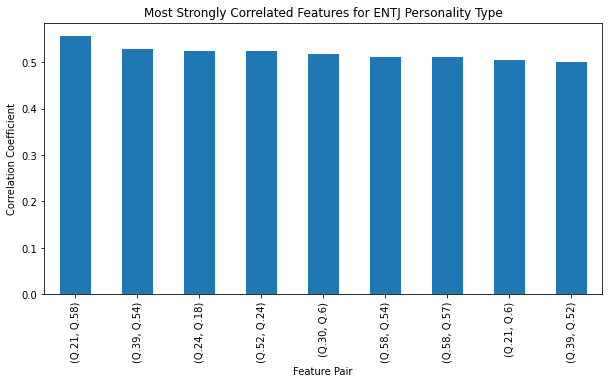

Next...ENTJ


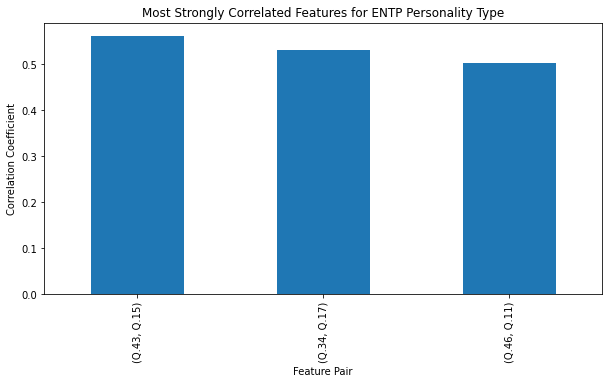

Next...ENTP


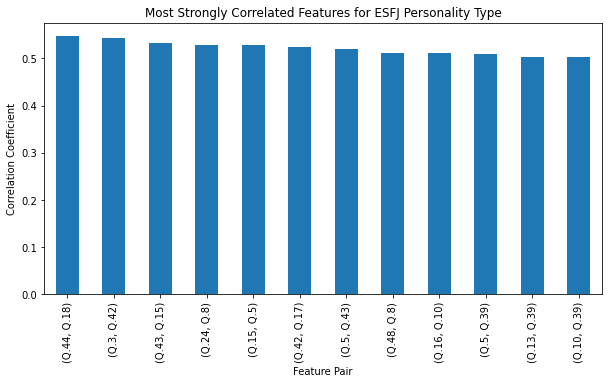

Next...ESFJ


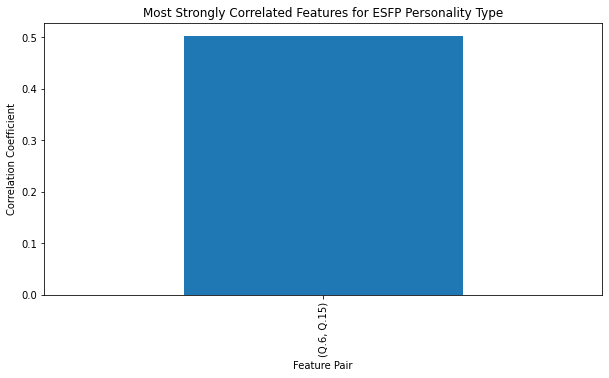

Next...ESFP


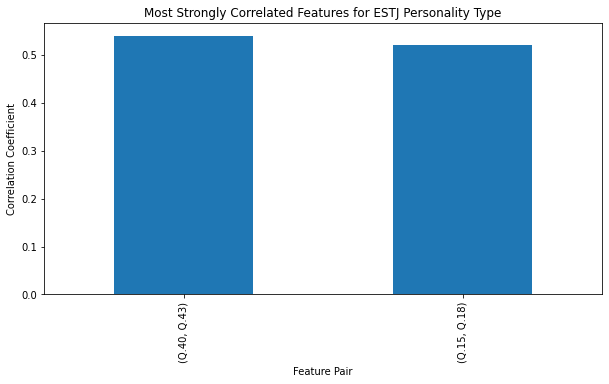

Next...ESTJ


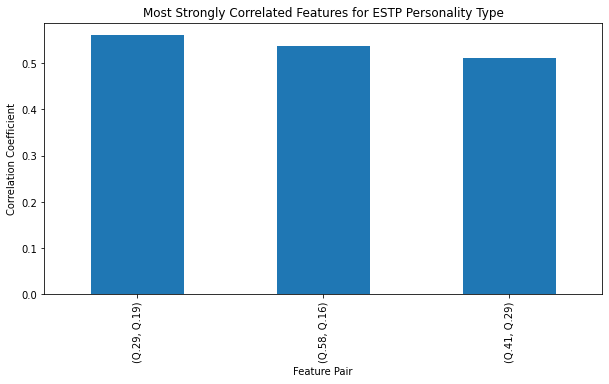

Next...ESTP


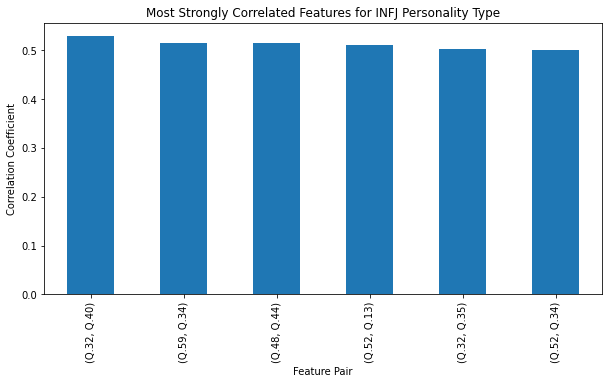

Next...INFJ


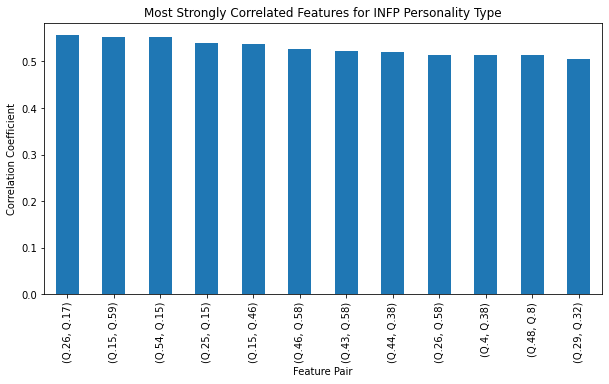

Next...INFP


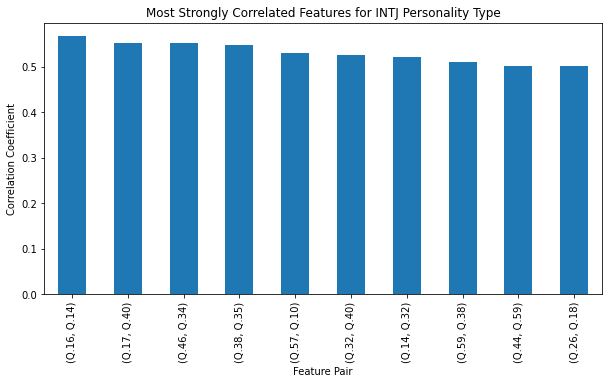

Next...INTJ


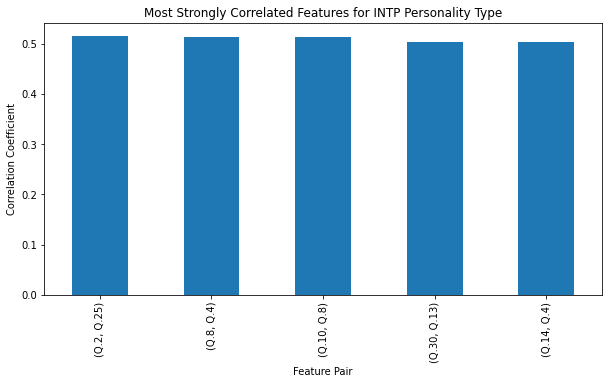

Next...INTP


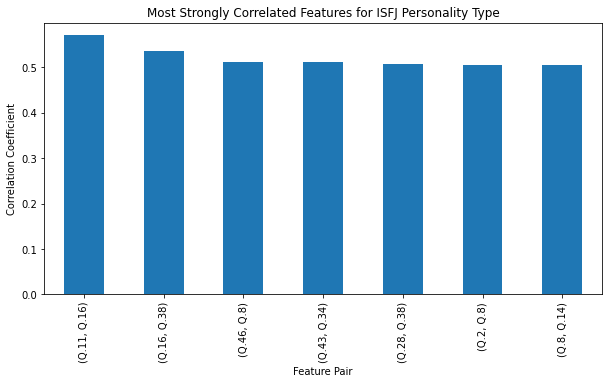

Next...ISFJ


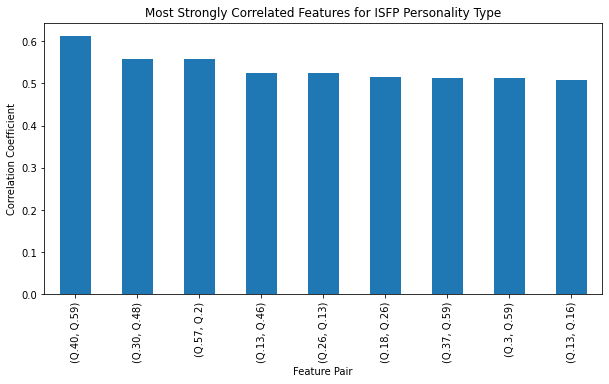

Next...ISFP


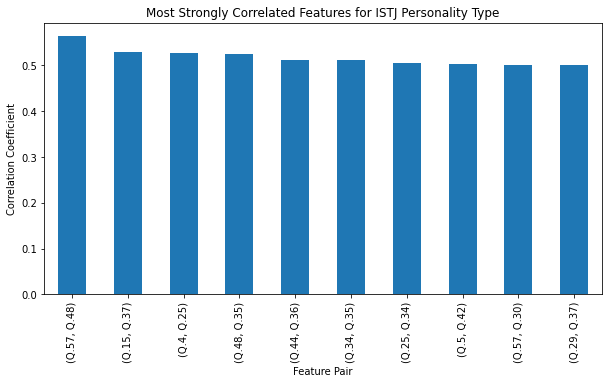

Next...ISTJ


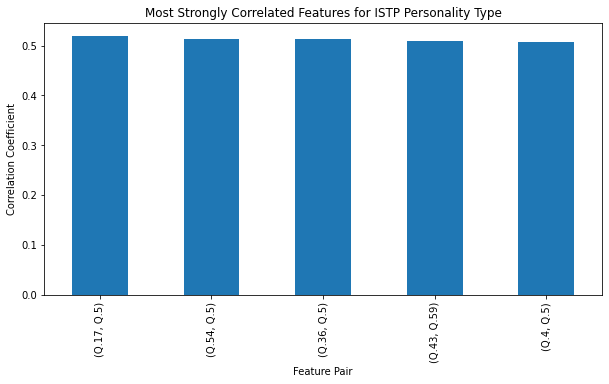

Next...ISTP


In [17]:
# Define the list of MBTI personality types
mbti_types = ["ENFJ", "ENFP", "ENTJ", "ENTP", "ESFJ", "ESFP", "ESTJ", "ESTP",
              "INFJ", "INFP", "INTJ", "INTP", "ISFJ", "ISFP", "ISTJ", "ISTP"]

# Loop through each personality type
for mbti in mbti_types:
    # Select the rows corresponding to the current personality type
    mbti_df = df[df["Personality"] == mbti]

    # Compute the correlation matrix for the current personality type
    corr = mbti_df.corr()

    # Identify the most strongly correlated features
    corr_matrix = corr.abs()
    corr_threshold = 0.5
    corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
    strong_pairs = corr_pairs[corr_pairs >= corr_threshold]
    strong_pairs = strong_pairs[strong_pairs < 1.0]

    # Create a bar chart of the most strongly correlated features
    fig, ax = plt.subplots(figsize=(10, 5))
    strong_pairs.plot(kind="bar", ax=ax)
    plt.title("Most Strongly Correlated Features for " + mbti + " Personality Type")
    plt.xlabel("Feature Pair")
    plt.ylabel("Correlation Coefficient")
    plt.show()
    print(f"Next...{mbti}")

##Exploratory Data Analysis

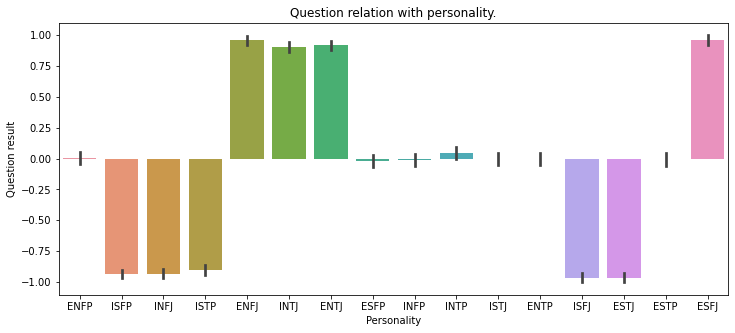

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Personality", y="Q.25")
plt.title('Question relation with personality.')
plt.ylabel('Question result');

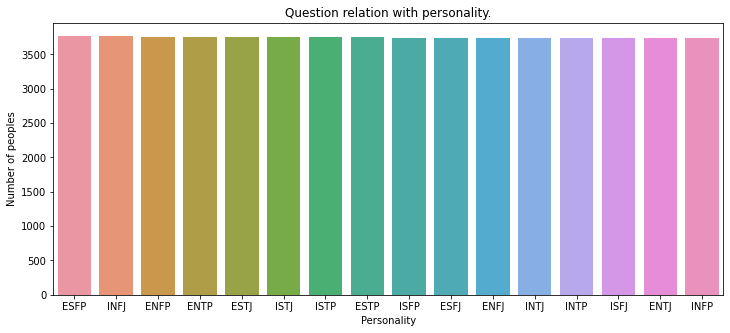

In [19]:
# Participants' nationality distriution
Per_result = pd.DataFrame(df['Personality'].value_counts())
Per_result_50 = Per_result[Per_result['Personality'] >= 50]
plt.figure(figsize=(12,5))
sns.barplot(data=Per_result_50, x=Per_result_50.index, y="Personality")
plt.title('Question relation with personality.')
plt.ylabel('Number of peoples');
plt.xlabel('Personality');

In [20]:
counts = df.groupby('Personality')[['Q.' + str(i) for i in range(60)]].apply(lambda x: (x > -4).all(axis=1).sum())
print(counts)

Personality
ENFJ    3743
ENFP    3760
ENTJ    3737
ENTP    3760
ESFJ    3746
ESFP    3769
ESTJ    3759
ESTP    3749
INFJ    3761
INFP    3734
INTJ    3743
INTP    3742
ISFJ    3739
ISFP    3746
ISTJ    3756
ISTP    3755
dtype: int64


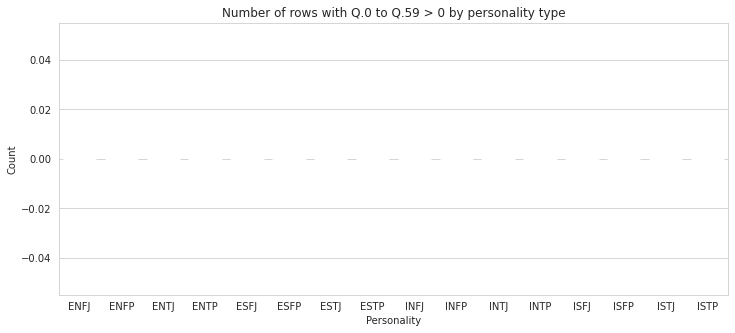

In [ ]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.set_palette('Set2')
counts = df.groupby('Personality')[['Q.' + str(i) for i in range(60)]].apply(lambda x: (x > 0-1).all(axis=1).sum())


# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts.values, palette='Set2')

# Set axis labels and title
plt.xlabel('Personality')
plt.ylabel('Count')
plt.title('Number of rows with Q.0 to Q.59 > 0 by personality type')
plt.show()

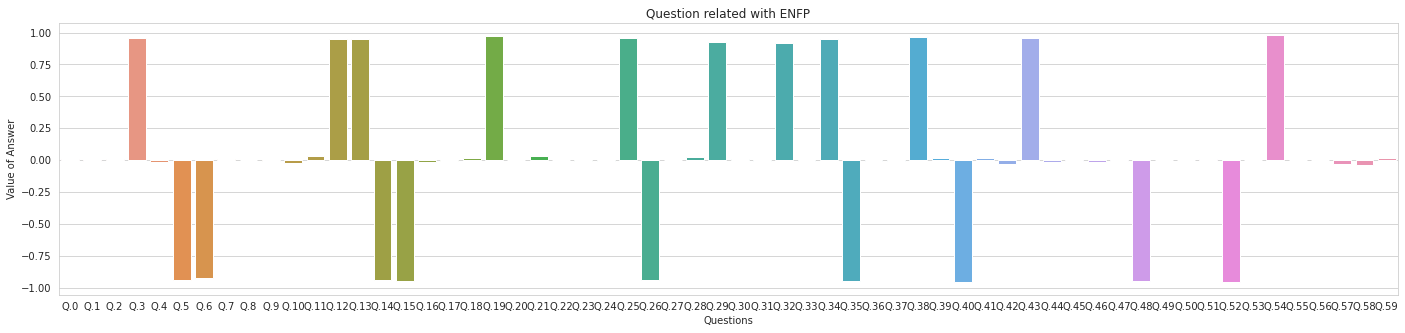

In [ ]:
plt.figure(figsize=(24,5))
# assume your data frame is called 'df'
df_enfp = df[df['Personality'] == 'ENFJ']
df_enfp_q = df_enfp.loc[:, 'Q.0':'Q.59'] # select columns Q.0 to Q.59
q_avg = df_enfp_q.mean(axis=0) # calculate the average value for each Q column

# plot the bar chart
sns.barplot(x=q_avg.index, y=q_avg.values)

# Set axis labels and title
plt.xlabel('Questions')
plt.ylabel('Value of Answer')
plt.title('Question related with ENFP')
plt.show()

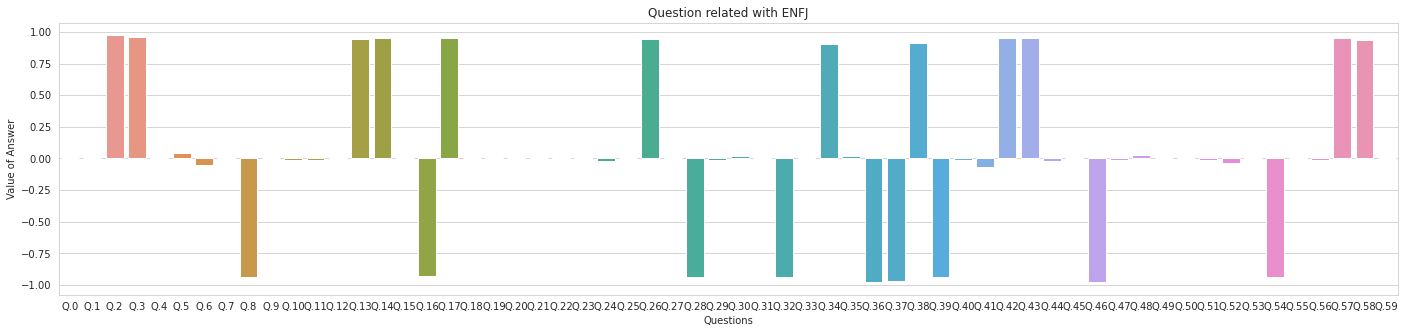

In [ ]:
plt.figure(figsize=(24,5))
# assume your data frame is called 'df'
df_enfp = df[df['Personality'] == 'ENFP']
df_enfp_q = df_enfp.loc[:, 'Q.0':'Q.59'] # select columns Q.0 to Q.59
q_avg = df_enfp_q.mean(axis=0) # calculate the average value for each Q column

# plot the bar chart
sns.barplot(x=q_avg.index, y=q_avg.values)

# Set axis labels and title
plt.xlabel('Questions')
plt.ylabel('Value of Answer')
plt.title('Question related with ENFJ')
plt.show()

Next Personality...


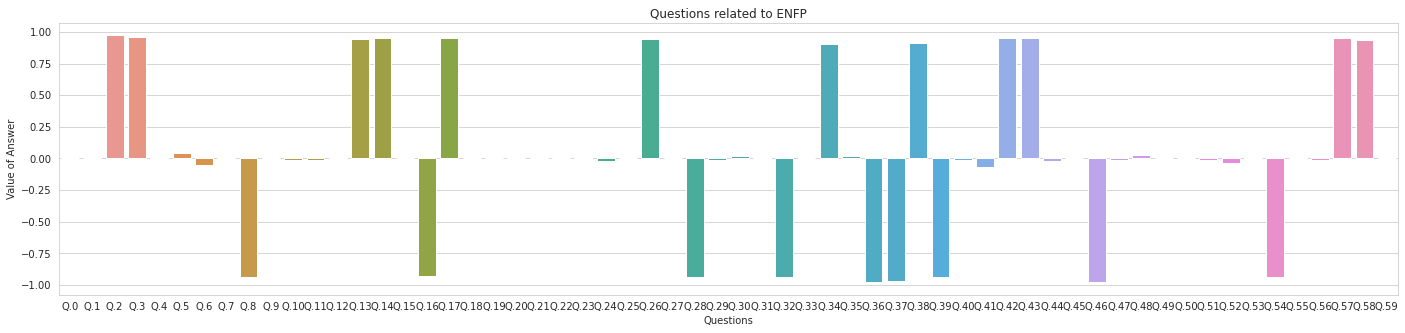

Next Personality...


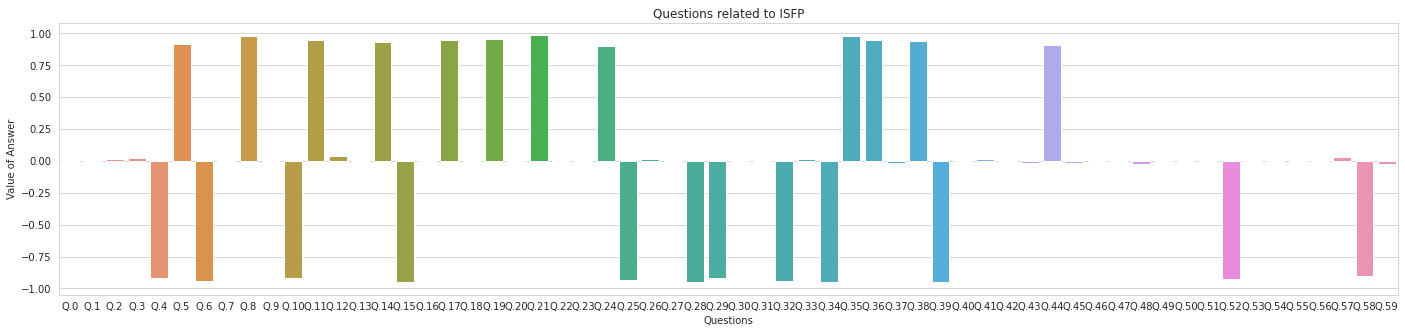

Next Personality...


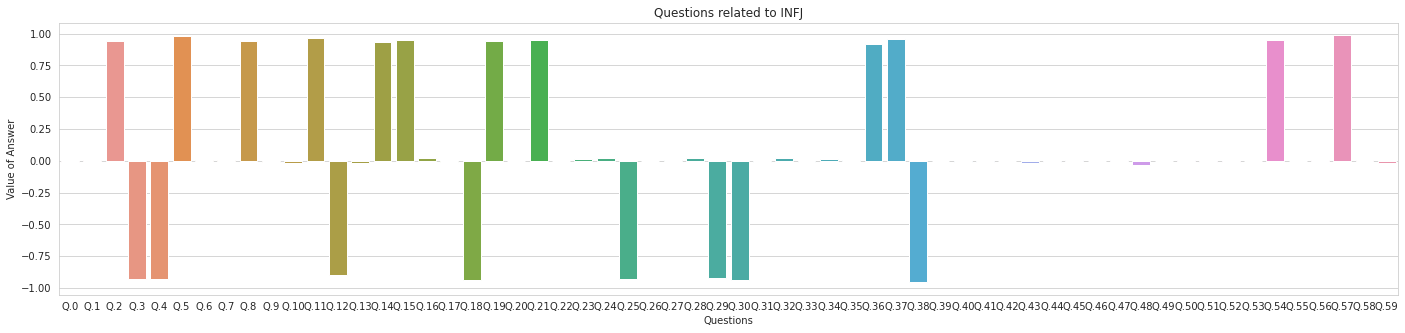

Next Personality...


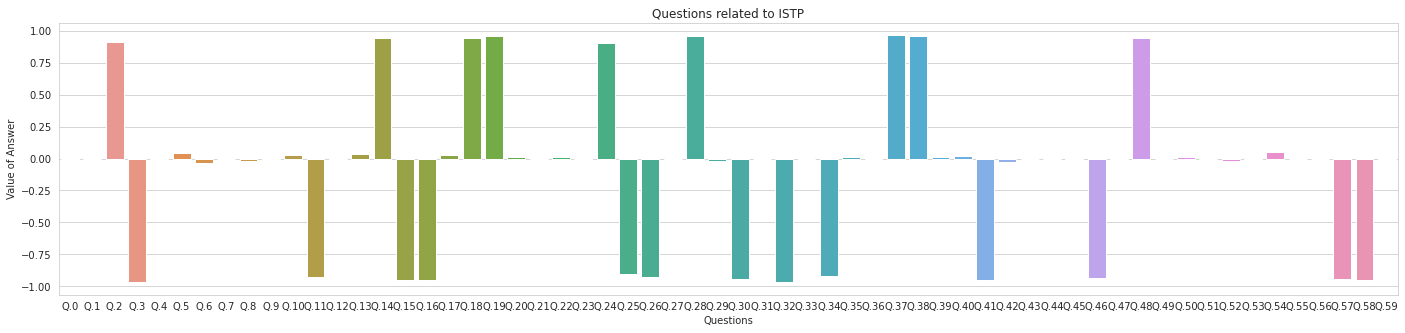

Next Personality...


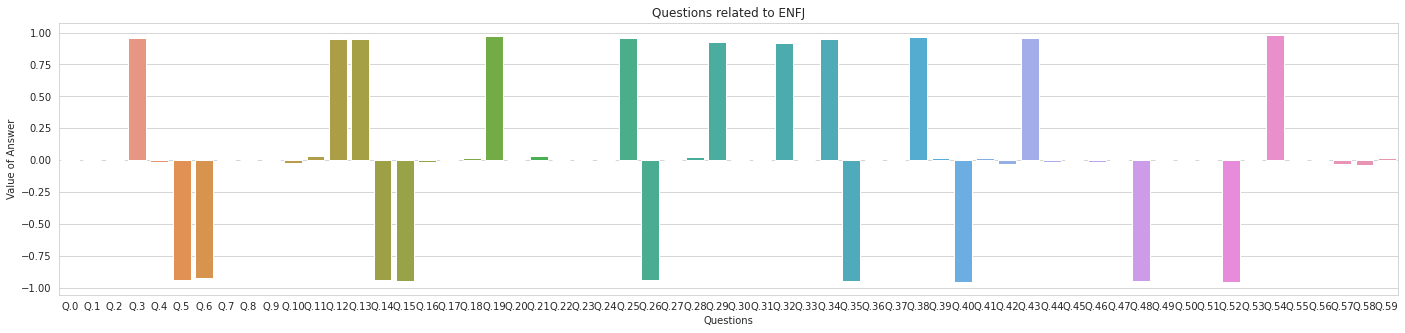

Next Personality...


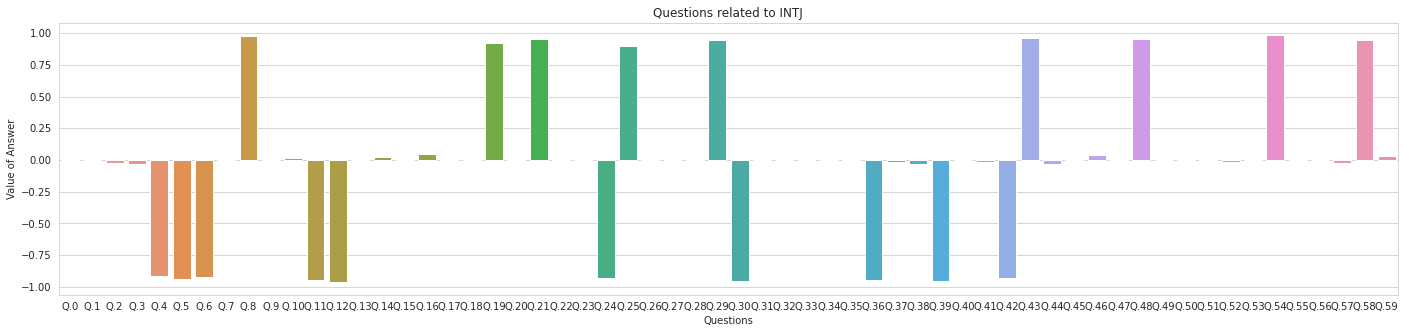

Next Personality...


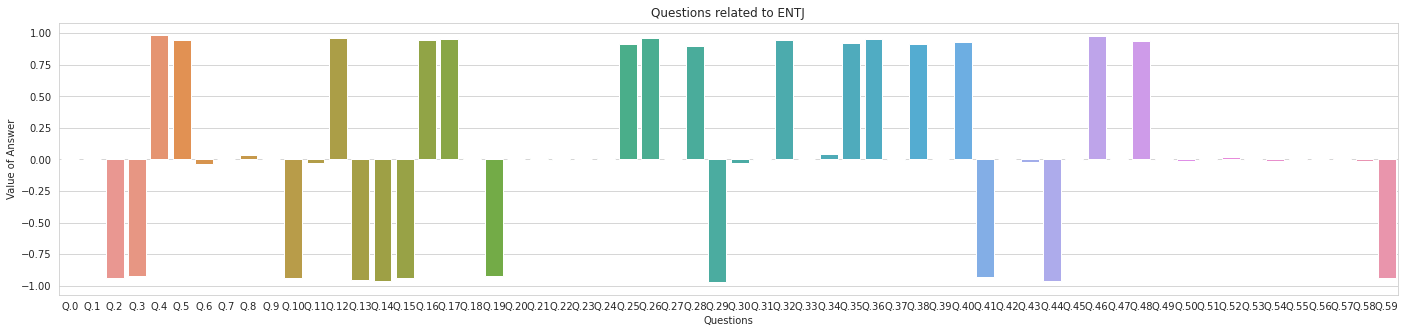

Next Personality...


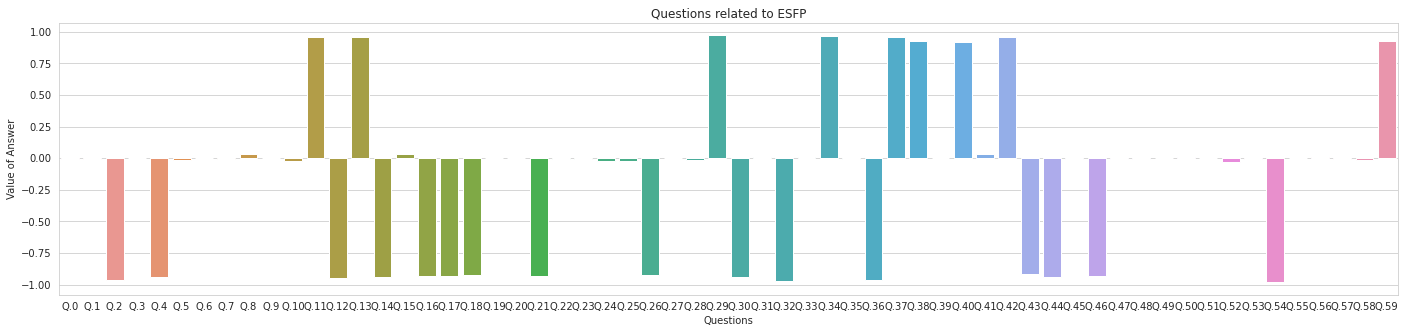

Next Personality...


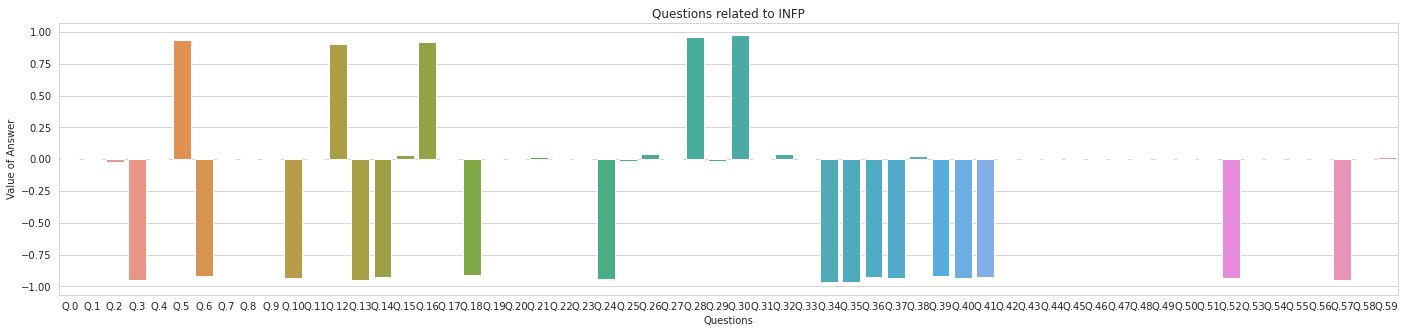

Next Personality...


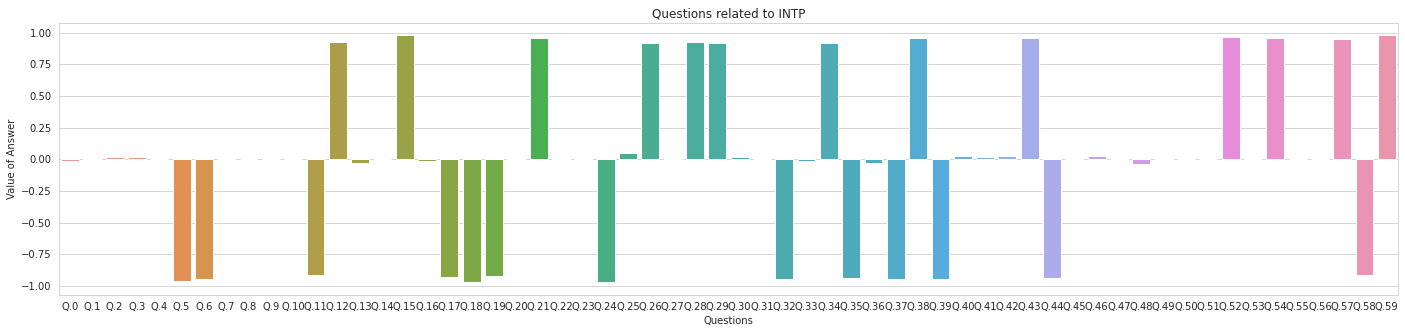

Next Personality...


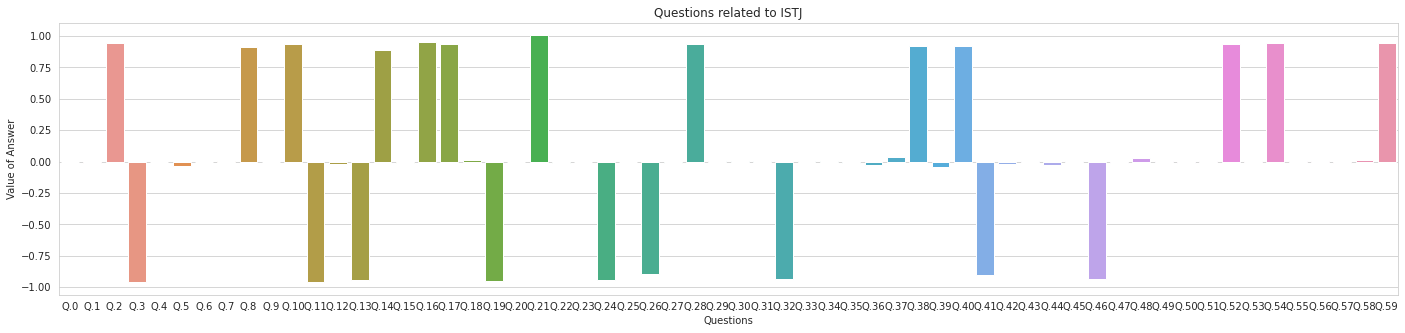

Next Personality...


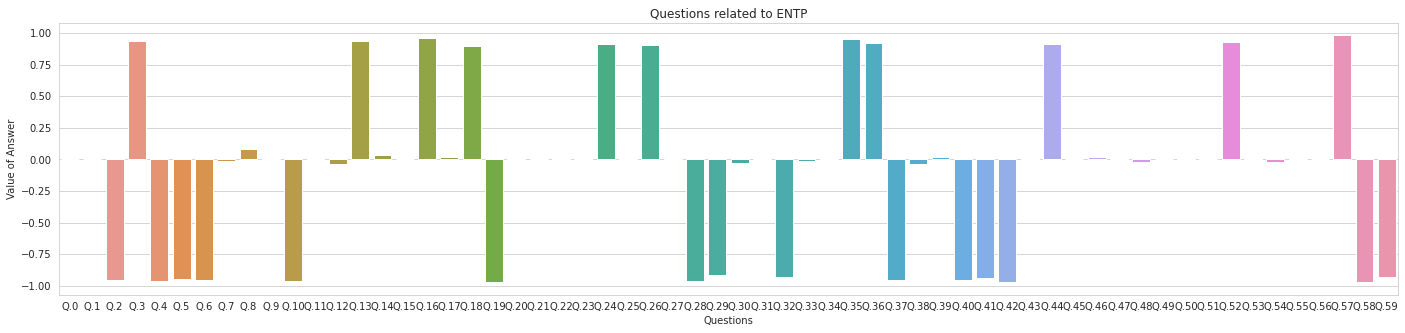

Next Personality...


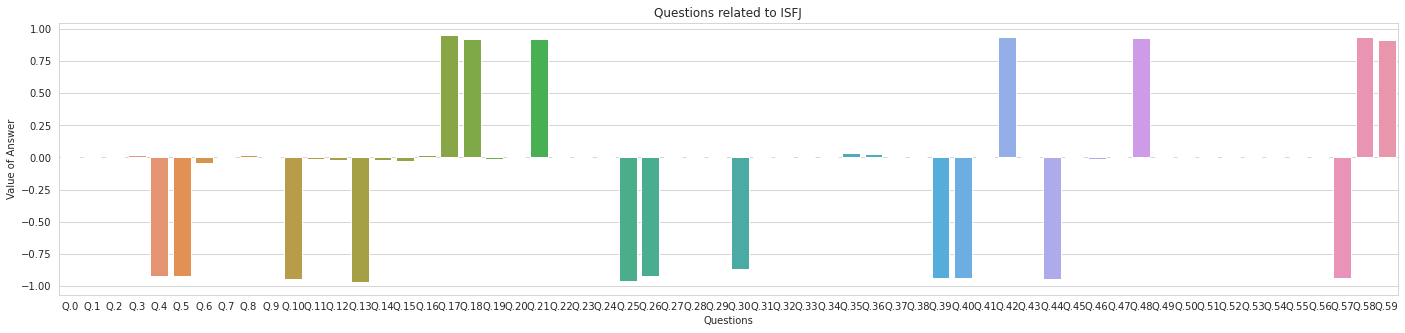

Next Personality...


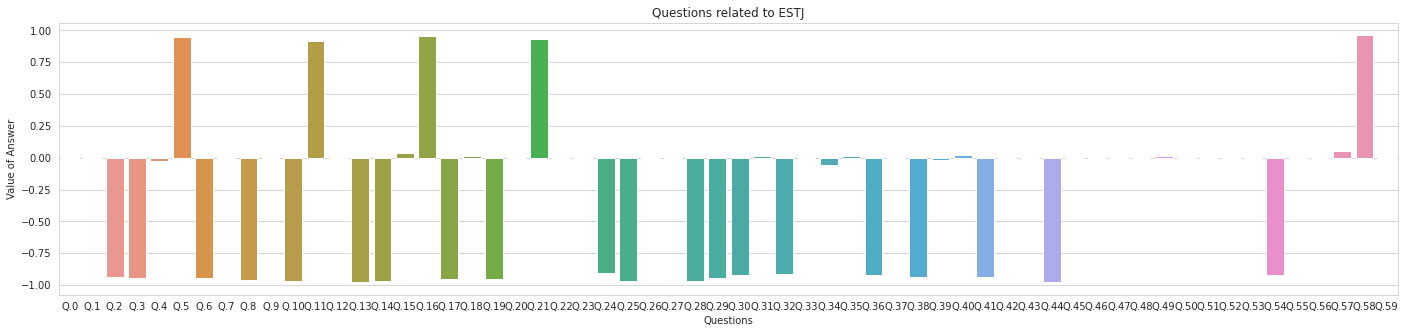

Next Personality...


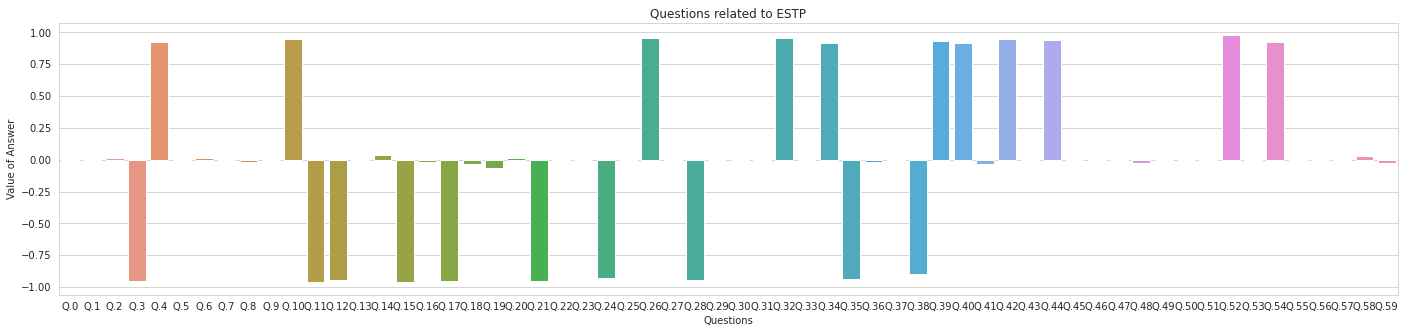

Next Personality...


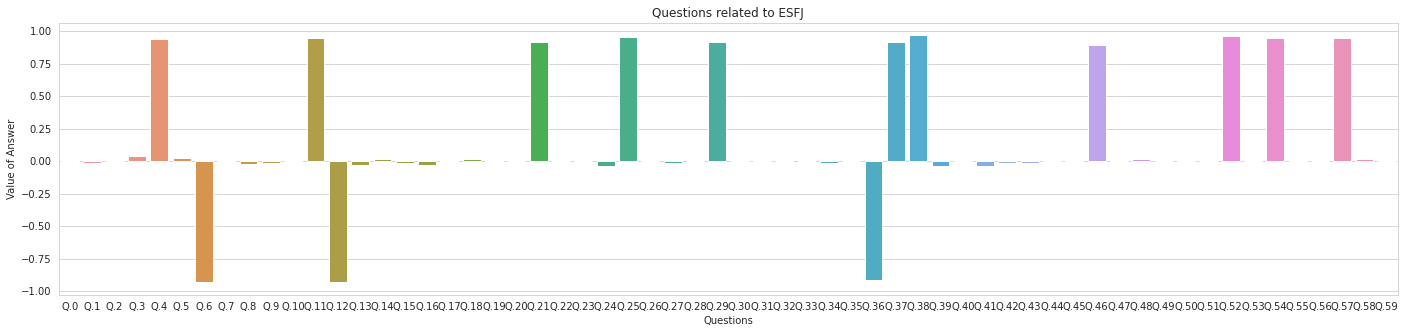

In [ ]:
# and the column for MBTI type is called 'Personality'
mbti_types = df['Personality'].unique()

# loop through each MBTI type
for mbti in mbti_types:
    # select rows for current MBTI type
    df_mbti = df[df['Personality'] == mbti]
    
    # select columns Q.0 to Q.59
    df_mbti_q = df_mbti.loc[:, 'Q.0':'Q.59']
    
    # calculate the average value for each Q column
    q_avg = df_mbti_q.mean(axis=0)
    
    # plot the bar chart
    plt.figure(figsize=(24,5))
    sns.barplot(x=q_avg.index, y=q_avg.values)
    
    # set axis labels and title
    plt.xlabel('Questions')
    plt.ylabel('Value of Answer')
    plt.title('Questions related to {}'.format(mbti))
    print('Next Personality...')
    
    plt.show()

<Axes: >

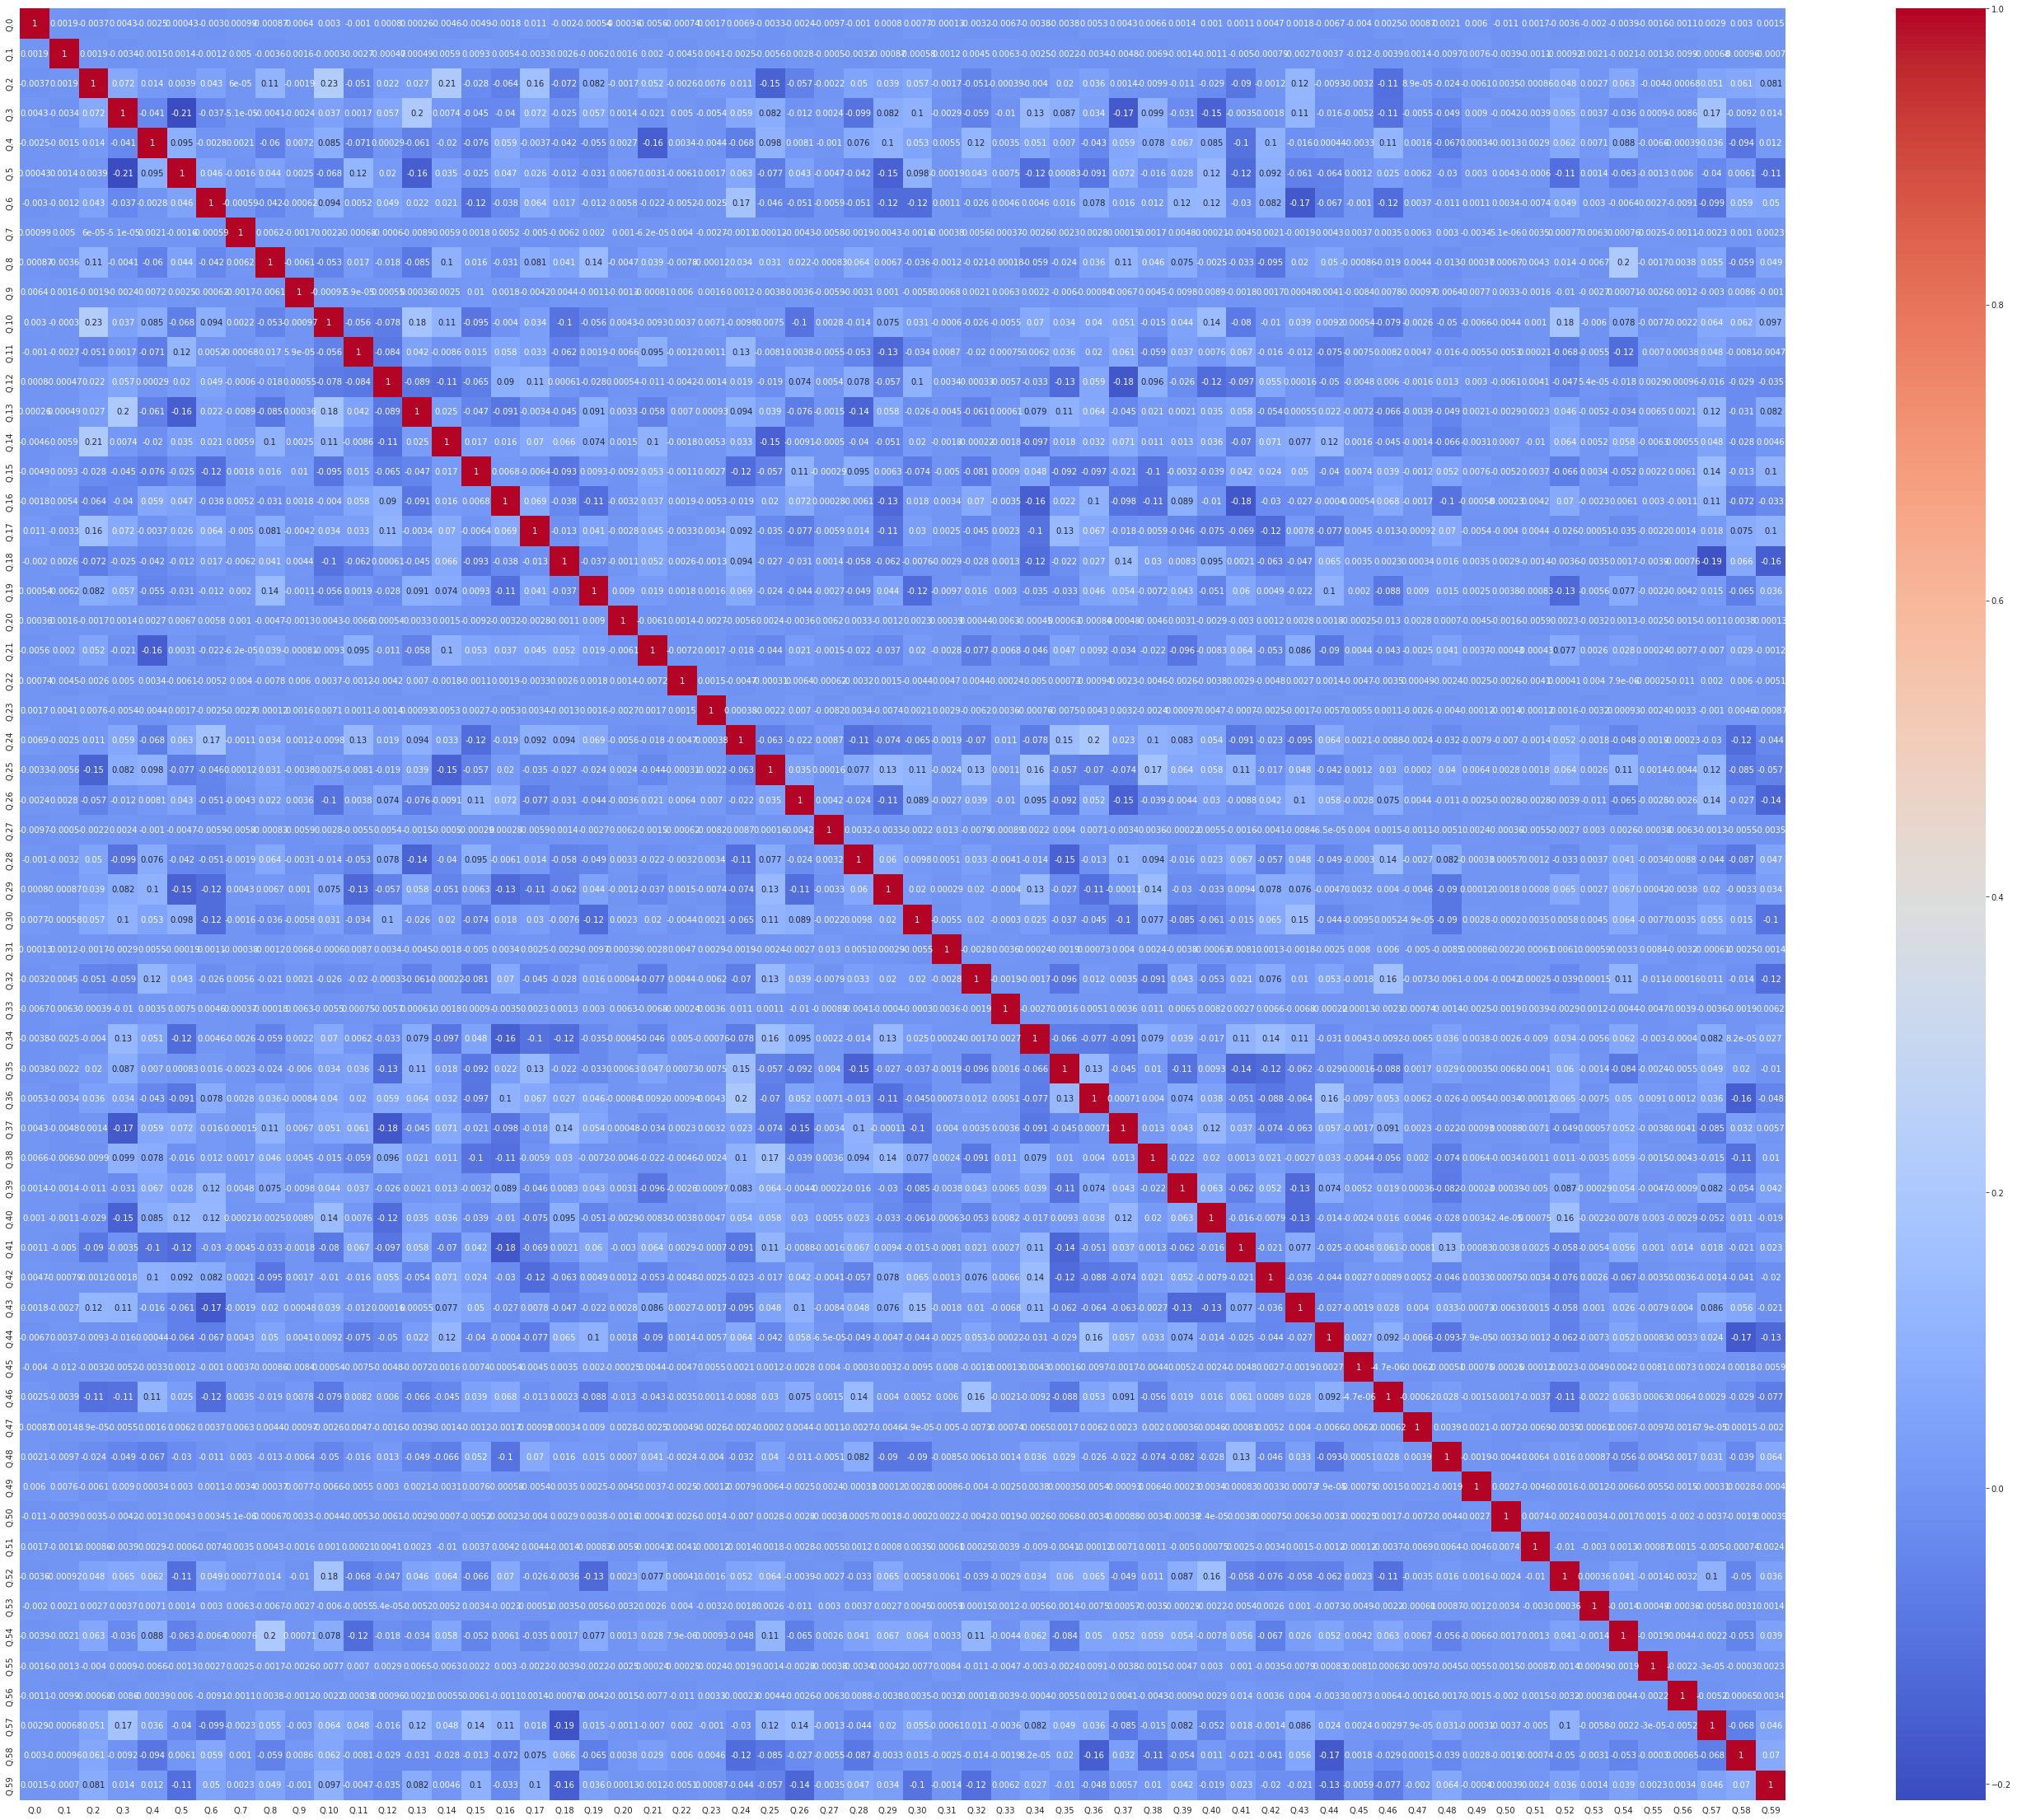

In [ ]:
# Heatmap
plt.figure(figsize=(48,40))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

##Data for model

In [21]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [22]:
x.shape

(59999, 60)

In [23]:
y.shape

(59999,)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#0.25 is testing data 25% of all, 75% of training data

##Modelling

In [25]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)       #training level

LogisticRegression()

##Evaluation

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[679   3   2   4   7   1   0   2   2   4   6   8   6   3   2   5]
 [  8 734   2   5   9   5   1   1   1   4   2   4   7   4   0   3]
 [  2   2 676   4   4   3   1   2   1   5   1   1   1   3   2   2]
 [  7   3   4 697   0   2   4   3   2   3   0   2   3   8   2   0]
 [  5   2   4   3 602  10   5   9  11   4  13   9   1   4   8   2]
 [  0   4   2   0   5 733   3   0   1   0   3   4   6   3   1   3]
 [  1   5   0   1   5   1 717   0   1   6   2   6  10   3   1   1]
 [  1   1   6   1   5   4   0 712   2   4   3   1   2   0   2   5]
 [  0   4   3   7  15   4   6   4 637   4   2   9   0  12   8   5]
 [ 14   3   7   3  11   1  12   8   5 632   4   1   9   2   2   3]
 [  8   1   0   1  15   5   1   3   0   4 650   6  10   9  11   3]
 [  4   7   2   0  14   6   0   3   2   1   9 717   2   2  11   3]
 [  5   3   2   1   0   4  10   2   8  10  13   7 671   4   3  16]
 [  2   6   4   7   5   1   1   0  12   3  14   0   4 732   2  11]
 [  2   1   5   1   7   1   1   1   4  11   2  15   6   1 711 

In [28]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_test, y_pred)*100,'%')
print('Precision Macro Score',precision_score(y_test, y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test, y_pred, average = 'macro')*100,'%')
print('F_Score',f1_score(y_test, y_pred, average = 'macro')*100,'%')

Accuracy Score 91.7 %
Precision Macro Score 91.67024183628925 %
Recall_Score 91.66551033320678 %
F_Score 91.66113998913978 %


##Testing

In [ ]:
#pip install catboost

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
#from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
import time
import sys


In [30]:
# define the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', tree.DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', svm.SVC()),
    #('CatBoost', CatBoostClassifier()),
    #('K-Means Clustering', KMeans())
]

# loop over the classifiers
for name, clf in classifiers:
    print('Evaluating classifier:', name)
    
    # get the start time
    start_time = time.time()
    
    # fit the classifier to the training data
    clf.fit(x_train, y_train)
    
    # predict on the test data
    y_pred = clf.predict(x_test)
    
    # calculate the accuracy score
    acc_score = accuracy_score(y_test, y_pred)
    
    # calculate the cross-validation score
    cv_score = cross_val_score(clf, x, y, cv=5).mean()
    
    # calculate the training time
    train_time = time.time() - start_time
    
    # calculate the model size in memory
    model_size = sys.getsizeof(clf)
    
    # print the results
    print('Accuracy score:', acc_score)
    print('Cross-validation score:', cv_score)
    print('Training time:', train_time)
    print('Model size (in bytes):', model_size)
    print('-------------------------------------------------')

Evaluating classifier: Logistic Regression
Accuracy score: 0.917
Cross-validation score: 0.9179319346056616
Training time: 30.697624921798706
Model size (in bytes): 48
-------------------------------------------------
Evaluating classifier: K-Nearest Neighbors
Accuracy score: 0.9896666666666667
Cross-validation score: 0.9890164791510404
Training time: 87.69085001945496
Model size (in bytes): 48
-------------------------------------------------
Evaluating classifier: Decision Tree
Accuracy score: 0.6416666666666667
Cross-validation score: 0.6489607078367642
Training time: 6.832759141921997
Model size (in bytes): 48
-------------------------------------------------
Evaluating classifier: Random Forest
Accuracy score: 0.97525
Cross-validation score: 0.9748162194071728
Training time: 98.25072813034058
Model size (in bytes): 48
-------------------------------------------------
Evaluating classifier: Support Vector Machine
Accuracy score: 0.9883333333333333
Cross-validation score: 0.98879980

##KNN Model

In [48]:
# Create KNN model with k=245
knn = KNeighborsClassifier(n_neighbors=245)

# Train the model on the training data
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=245)

In [49]:
y_pred = knn.predict(x_test)

In [33]:
# get the start time
start_time = time.time()
train_time = time.time() - start_time
print('Training time:', train_time)

Training time: 6.890296936035156e-05


In [34]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


print('Accuracy Score',accuracy_score(y_test, y_pred)*100,'%')
print('Precision Macro Score',precision_score(y_test, y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test, y_pred, average = 'macro')*100,'%')
print('F_Score',f1_score(y_test, y_pred, average = 'macro')*100,'%')

Accuracy Score 98.85833333333333 %
Precision Macro Score 98.85649921422069 %
Recall_Score 98.85589528716416 %
F_Score 98.85503769005403 %


In [ ]:
import joblib
# save your model
filename = 'knn_model.sav'
joblib.dump(knn, filename)

['knn_model.sav']

##For Data Visualization

In [41]:
# Train KNN models with different values of n_neighbors and weights
for n_neighbors in [1, 5, 10]:
    for weights in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        knn.fit(x_train, y_train)
        train_score = knn.score(x_train, y_train)
        test_score = knn.score(x_test, y_test)
        print(f"n_neighbors={n_neighbors}, weights={weights}, train_score={train_score:.3f}, test_score={test_score:.3f}")


n_neighbors=1, weights=uniform, train_score=1.000, test_score=0.980
n_neighbors=1, weights=distance, train_score=1.000, test_score=0.980
n_neighbors=5, weights=uniform, train_score=0.990, test_score=0.990
n_neighbors=5, weights=distance, train_score=1.000, test_score=0.990
n_neighbors=10, weights=uniform, train_score=0.990, test_score=0.989
n_neighbors=10, weights=distance, train_score=1.000, test_score=0.990


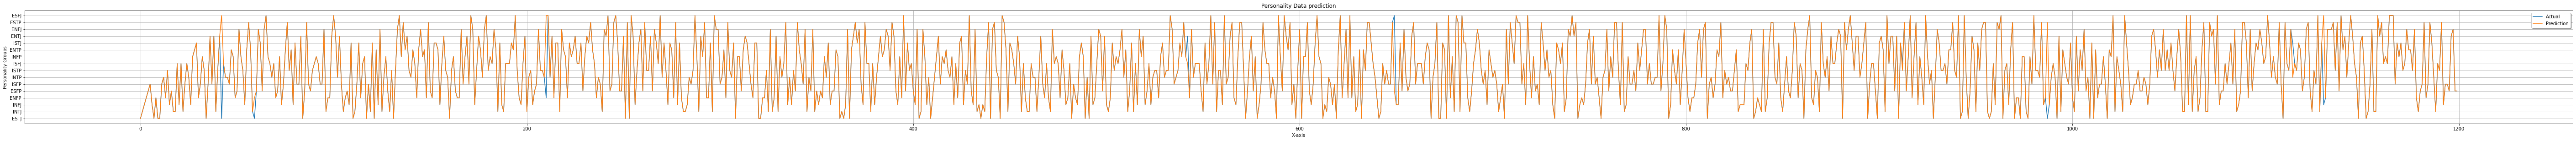

In [60]:
x_ax = range(len(y_test))
plt.figure(figsize=(100,10))
plt.subplot(2,1,1)
plt.plot(x_ax, y_test, label="Actual")
plt.plot(x_ax, y_pred, label="Prediction")
plt.title("Personality Data prediction")
plt.xlabel('X-axis')
plt.ylabel('Personality Groups')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)